## Sunday Final Year Project
Using Machine Learning to Predict Cloud Services, if  it will be required to scale up, down or no action taken based on the resource usage. using different algorithms to find the best model for the prediction.

In [7]:
!pip install streamlit-jupyter


  Using cached fqdn-1.5.1-py3-none-any.whl.metadata (1.4 kB)
  Using cached isoduration-20.11.0-py3-none-any.whl.metadata (5.7 kB)
  Using cached uri_template-1.3.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached webcolors-25.10.0-py3-none-any.whl.metadata (2.2 kB)
Using cached webcolors-25.10.0-py3-none-any.whl (14 kB)
Using cached fqdn-1.5.1-py3-none-any.whl (9.1 kB)
Using cached isoduration-20.11.0-py3-none-any.whl (11 kB)
Using cached uri_template-1.3.0-py3-none-any.whl (11 kB)

   ----------------- ---------------------- 3/7 [fastcore]
   ----------------- ---------------------- 3/7 [fastcore]
   ---------------------- ----------------- 4/7 [isoduration]
   ---------------------------------------- 7/7 [streamlit-jupyter]



In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE, RandomOverSampler
import matplotlib.pyplot as plt
import streamlit as st
from streamlit_jupyter import StreamlitPatcher


In [10]:
st.markdown("Sunday Final Year Project", unsafe_allow_html=False, help=None)



2026-01-18 23:22:10.742 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-01-18 23:22:10.744 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [11]:
df = pd.read_csv('data/Cloud_Dataset.csv')

In [12]:
df.head()

,timestamp,cpu_usage,memory_usage,net_io,disk_io,cloud_provider,region,vm_type,vCPU,RAM_GB,price_per_hour,target,latency_ms,throughput,cost,utilization
0,2024-01-01 00:00:00,43.71,95.56,379.40,638.79,Azure,us-east,t2.micro,1,1.0,0.0116,scale_up,228.02,1380.99,0.0174,69.64
1,2024-01-01 00:05:00,15.23,87.96,320.50,737.27,Azure,us-west,t2.micro,1,1.0,0.0116,scale_up,243.71,1059.03,0.0174,51.59
2,2024-01-01 00:10:00,26.36,26.51,186.91,572.28,AWS,us-east,B1s,1,1.0,0.0120,scale_down,256.32,500.59,0.0180,26.44
3,2024-01-01 00:15:00,65.07,22.55,181.47,429.73,AWS,asia-south,B1s,1,1.0,0.0120,no_action,270.85,864.91,0.0180,43.81
4,2024-01-01 00:20:00,27.97,56.28,316.59,141.81,Azure,us-east,B1s,1,1.0,0.0120,no_action,246.37,861.28,0.0180,42.12


In [69]:
df["vm_type"].unique()

array(['t2.micro', 'B1s', 'n1-standard-1'], dtype=object)

In [13]:
df["cloud_provider"].unique()

array(['Azure', 'AWS', 'GCP'], dtype=object)

In [30]:
df.drop(columns=["region"], inplace=True)

In [14]:
one_hot_encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
categorical_features = ['cloud_provider', "vm_type", "cloud_provider"]
one_hot_encoded = one_hot_encoder.fit_transform(df[categorical_features])

In [15]:
one_hot_encoded.head()

,cloud_provider_AWS,cloud_provider_Azure,cloud_provider_GCP,vm_type_B1s,vm_type_n1-standard-1,vm_type_t2.micro,cloud_provider_AWS,cloud_provider_Azure,cloud_provider_GCP
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [16]:
df = pd.concat([df.drop(columns=categorical_features), one_hot_encoded], axis=1)
df.head()

,timestamp,cpu_usage,memory_usage,net_io,disk_io,region,vCPU,RAM_GB,price_per_hour,target,latency_ms,throughput,cost,utilization,cloud_provider_AWS,cloud_provider_Azure,cloud_provider_GCP,vm_type_B1s,vm_type_n1-standard-1,vm_type_t2.micro,cloud_provider_AWS,cloud_provider_Azure,cloud_provider_GCP
0,2024-01-01 00:00:00,43.71,95.56,379.40,638.79,us-east,1,1.0,0.0116,scale_up,228.02,1380.99,0.0174,69.64,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,2024-01-01 00:05:00,15.23,87.96,320.50,737.27,us-west,1,1.0,0.0116,scale_up,243.71,1059.03,0.0174,51.59,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,2024-01-01 00:10:00,26.36,26.51,186.91,572.28,us-east,1,1.0,0.0120,scale_down,256.32,500.59,0.0180,26.44,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,2024-01-01 00:15:00,65.07,22.55,181.47,429.73,asia-south,1,1.0,0.0120,no_action,270.85,864.91,0.0180,43.81,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,2024-01-01 00:20:00,27.97,56.28,316.59,141.81,us-east,1,1.0,0.0120,no_action,246.37,861.28,0.0180,42.12,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   timestamp              1000 non-null   object 
 1   cpu_usage              1000 non-null   float64
 2   memory_usage           1000 non-null   float64
 3   net_io                 1000 non-null   float64
 4   disk_io                1000 non-null   float64
 5   region                 1000 non-null   object 
 6   vCPU                   1000 non-null   int64  
 7   RAM_GB                 1000 non-null   float64
 8   price_per_hour         1000 non-null   float64
 9   target                 1000 non-null   object 
 10  latency_ms             1000 non-null   float64
 11  throughput             1000 non-null   float64
 12  cost                   1000 non-null   float64
 13  utilization            1000 non-null   float64
 14  cloud_provider_AWS     1000 non-null   float64
 15  cloud

In [19]:
df["timestamp"] = pd.to_datetime(df["timestamp"])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   timestamp              1000 non-null   object 
 1   cpu_usage              1000 non-null   float64
 2   memory_usage           1000 non-null   float64
 3   net_io                 1000 non-null   float64
 4   disk_io                1000 non-null   float64
 5   region                 1000 non-null   object 
 6   vCPU                   1000 non-null   int64  
 7   RAM_GB                 1000 non-null   float64
 8   price_per_hour         1000 non-null   float64
 9   target                 1000 non-null   object 
 10  latency_ms             1000 non-null   float64
 11  throughput             1000 non-null   float64
 12  cost                   1000 non-null   float64
 13  utilization            1000 non-null   float64
 14  cloud_provider_AWS     1000 non-null   float64
 15  cloud

In [20]:
df.head()

,timestamp,cpu_usage,memory_usage,net_io,disk_io,region,vCPU,RAM_GB,price_per_hour,target,latency_ms,throughput,cost,utilization,cloud_provider_AWS,cloud_provider_Azure,cloud_provider_GCP,vm_type_B1s,vm_type_n1-standard-1,vm_type_t2.micro,cloud_provider_AWS,cloud_provider_Azure,cloud_provider_GCP
0,2024-01-01 00:00:00,43.71,95.56,379.40,638.79,us-east,1,1.0,0.0116,scale_up,228.02,1380.99,0.0174,69.64,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,2024-01-01 00:05:00,15.23,87.96,320.50,737.27,us-west,1,1.0,0.0116,scale_up,243.71,1059.03,0.0174,51.59,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,2024-01-01 00:10:00,26.36,26.51,186.91,572.28,us-east,1,1.0,0.0120,scale_down,256.32,500.59,0.0180,26.44,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,2024-01-01 00:15:00,65.07,22.55,181.47,429.73,asia-south,1,1.0,0.0120,no_action,270.85,864.91,0.0180,43.81,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,2024-01-01 00:20:00,27.97,56.28,316.59,141.81,us-east,1,1.0,0.0120,no_action,246.37,861.28,0.0180,42.12,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [21]:
df.drop(columns=['timestamp'], inplace=True)

In [22]:
df["target"].unique()

array(['scale_up', 'scale_down', 'no_action'], dtype=object)

In [23]:
df["target"].value_counts(normalize=True)

target
no_action     0.658
scale_up      0.293
scale_down    0.049
Name: proportion, dtype: float64

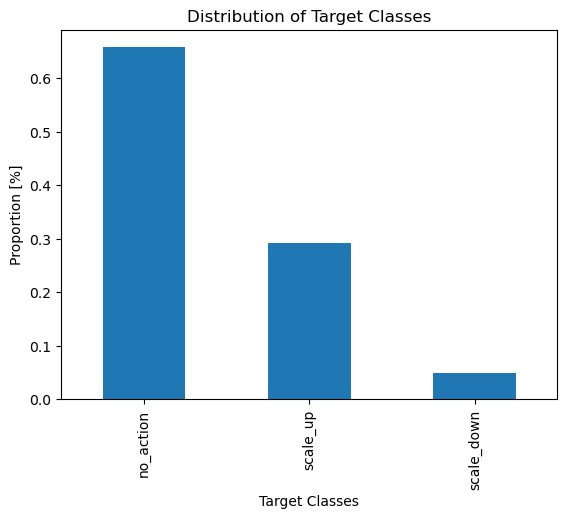

In [79]:
df["target"].value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Target Classes')
plt.ylabel('Proportion [%]')
plt.title('Distribution of Target Classes');

In [24]:
le = LabelEncoder()
df['target'] = le.fit_transform(df['target'])

In [25]:
df["target"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: target
Non-Null Count  Dtype
--------------  -----
1000 non-null   int64
dtypes: int64(1)
memory usage: 7.9 KB


In [35]:
X = df.drop(columns=['target'])
y = df['target']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=42, stratify=y_train
)

In [37]:
X_train_balanced, y_train_balanced = RandomOverSampler(random_state=42).fit_resample(X_train, y_train)

In [38]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(random_state=42)

In [39]:
y_pred = rf_model.predict(X_val)

validation_accuracy = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {validation_accuracy:.4f}")

Validation Accuracy: 0.9950


In [40]:
print("Classification report", classification_report(y_val, y_pred))


Classification report               precision    recall  f1-score   support

           0       1.00      0.99      1.00       131
           1       1.00      1.00      1.00        10
           2       0.98      1.00      0.99        59

    accuracy                           0.99       200
   macro avg       0.99      1.00      1.00       200
weighted avg       1.00      0.99      1.00       200



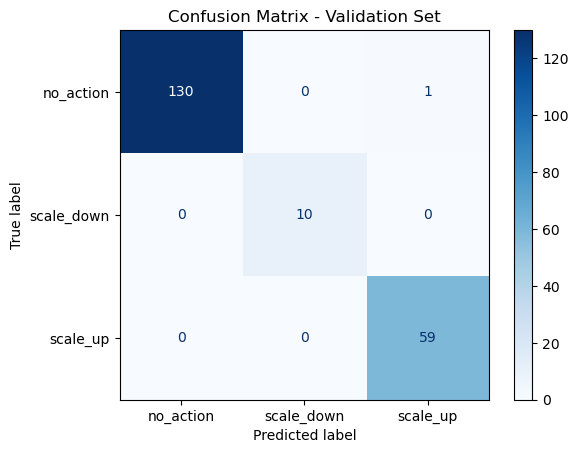

In [41]:
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Validation Set")
plt.show()

In [42]:
param_grid = {
    "n_estimators": [10, 100, 200, 300],
    "max_depth": [None, 3, 5, 10, 20, 30],
    "max_features": ['auto', 'sqrt', 'log2', None],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False],
}
rf_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    n_jobs=-1,
    verbose=2
)
grid_search.fit(X_train_balanced, y_train_balanced)
best_rf = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)
print("Best score", grid_search.best_score_)

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


c:\Users\HomePC\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
432 fits failed out of a total of 1728.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
206 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HomePC\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\HomePC\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\Users\HomePC\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_par

Best Hyperparameters: {'bootstrap': True, 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'n_estimators': 100}
Best score 0.9983122362869198


In [45]:
y_pred = best_rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {test_accuracy:.4f}")
print("Classification report", classification_report(y_val, y_pred))


Test accuracy: 0.9950
Classification report               precision    recall  f1-score   support

           0       0.60      0.61      0.61       131
           1       0.00      0.00      0.00        10
           2       0.19      0.19      0.19        59

    accuracy                           0.46       200
   macro avg       0.26      0.27      0.26       200
weighted avg       0.45      0.46      0.45       200



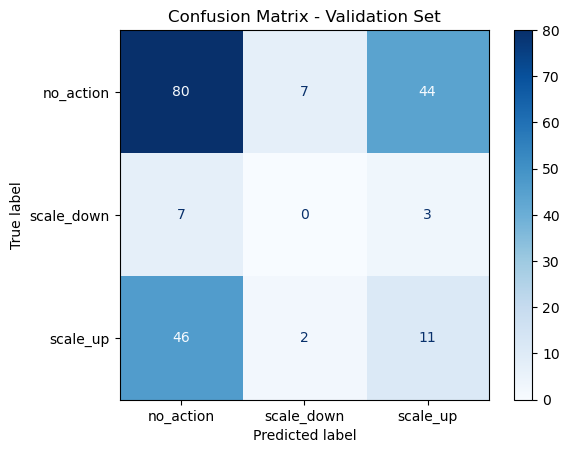

In [46]:
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Validation Set')
plt.show()


In [51]:
# Feature importance
importances = best_rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

<Axes: ylabel='Feature'>

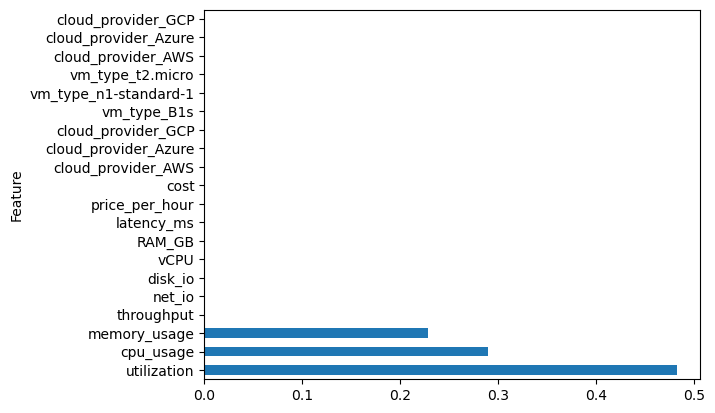

In [52]:
feature_importance_df.plot(kind="barh", x='Feature', y='Importance', legend=False)

In [48]:
feature_importance_df.head(10)

,Feature,Importance
10,utilization,0.482331
0,cpu_usage,0.289324
1,memory_usage,0.228088
8,throughput,0.000163
2,net_io,0.000095
3,disk_io,0.000000
4,vCPU,0.000000
5,RAM_GB,0.000000
7,latency_ms,0.000000
6,price_per_hour,0.000000


In [49]:
pred_df = pd.DataFrame({
    'Actual': le.inverse_transform(y_test),
    "predicted": le.inverse_transform(y_pred)
})
pred_df.tail()

,Actual,predicted
195,no_action,no_action
196,no_action,no_action
197,no_action,no_action
198,no_action,no_action
199,scale_up,scale_up
